Bobby Meshesha

## Data Science Exploration and Predictive Modeling

In this notebook, I demonstrate key data science techniques by applying them to real-world datasets. From exploratory data analysis to model fitting and visualization, I uncover hidden insights and build predictive models that transform raw data into actionable outcomes.

You will see how I:
- Explore datasets to identify trends and patterns,
- Engineer features to optimize predictive performance,
- Fit and evaluate machine learning models to make accurate predictions,
- Visualize complex relationships between variables for clear interpretation.

This project highlights my ability to leverage data-driven methods for impactful decision-making, showcasing skills essential to driving business value in any data-centric role.

## Table of Contents

1. [Introduction](#introduction)
2. [Dataset Overview](#dataset-overview)
3. [Data Preprocessing](#data-preprocessing)
    - 3.1 [Handling Missing Values](#handling-missing-values)
    - 3.2 [Feature Engineering](#feature-engineering)
4. [Exploratory Data Analysis](#exploratory-data-analysis)
    - 4.1 [Summary Statistics](#summary-statistics)
    - 4.2 [Data Visualizations](#data-visualizations)
5. [Model Fitting](#model-fitting)
    - 5.1 [Logistic Regression Model](#logistic-regression-model)
    - 5.2 [Random Forest Model](#random-forest-model)
6. [Model Evaluation](#model-evaluation)
    - 6.1 [Confusion Matrix](#confusion-matrix)
    - 6.2 [Model Interpretation](#model-interpretation)
7. [Stepwise Model Selection](#stepwise-model-selection)
8. [Conclusion](#conclusion)

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Dataset Overview
This dataset comes from the Fair's Affairs study, which surveyed 6366 participants on extramarital behavior and various demographic characteristics. Collected in 1969, the data includes variables such as:
- Affair frequency
- Gender
- Age
- Marriage duration
- Religiousness
- Education
- Occupation
- Self-rated marital happiness

This dataset allows us to explore relationships between personal characteristics and the likelihood of engaging in extramarital affairs.

### Descriptive Analysis
In this analysis, I will use descriptive statistics and exploratory data techniques to summarize the characteristics of participants in the Fair's Affairs dataset. Specifically, I will calculate:
- The average number of children
- The average age of respondents

These metrics will help in understanding the demographic profile of participants, along with addressing the ethical concerns associated with the dataset.

In [144]:
affairs = sm.datasets.fair.load_pandas().data
print(sm.datasets.fair.NOTE)

::

    Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
          

In [145]:
affairs.head()

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
0            3.0  32.0          9.0       3.0        3.0  17.0         2.0   
1            3.0  27.0         13.0       3.0        1.0  14.0         3.0   
2            4.0  22.0          2.5       0.0        1.0  16.0         3.0   
3            4.0  37.0         16.5       4.0        3.0  16.0         5.0   
4            5.0  27.0          9.0       1.0        1.0  14.0         3.0   

   occupation_husb   affairs  
0              5.0  0.111111  
1              4.0  3.230769  
2              5.0  1.400000  
3              5.0  0.727273  
4              4.0  4.666666

In [146]:
summary_stats=affairs.describe()
print(summary_stats)

       rate_marriage          age  yrs_married     children    religious  \
count    6366.000000  6366.000000  6366.000000  6366.000000  6366.000000   
mean        4.109645    29.082862     9.009425     1.396874     2.426170   
std         0.961430     6.847882     7.280120     1.433471     0.878369   
min         1.000000    17.500000     0.500000     0.000000     1.000000   
25%         4.000000    22.000000     2.500000     0.000000     2.000000   
50%         4.000000    27.000000     6.000000     1.000000     2.000000   
75%         5.000000    32.000000    16.500000     2.000000     3.000000   
max         5.000000    42.000000    23.000000     5.500000     4.000000   

              educ   occupation  occupation_husb      affairs  
count  6366.000000  6366.000000      6366.000000  6366.000000  
mean     14.209865     3.424128         3.850141     0.705374  
std       2.178003     0.942399         1.346435     2.203374  
min       9.000000     1.000000         1.000000     0.0000

### Ethical Considerations and Data Description
The dataset contains personal and sensitive information about infidelity, raising significant ethical concerns. Explicit informed consent is crucial for participants to understand that their data will be used for analysis, and the data must be anonymized to avoid potential harm.

From the dataset:
- The average age of participants is 32.5 years, with a range from 17.5 to 42 years, covering young adults to middle-aged individuals.
- The average number of children is 1.44, showing moderate variability in family size.
- The average marital happiness score is 4 out of 5, suggesting that most participants are satisfied in their marriages.

### Exploring Participants Who Had an Affair
Instead of modeling the number of affairs, I will create a binary outcome variable to indicate whether a participant has had an affair or not. 
This binary classification will allow for simpler analysis and application of logistic regression models. However, it also has some trade-offs.

In [149]:
affairs['had_affair'] = (affairs['affairs'] > 0).astype(int)
print(affairs[['affairs', 'had_affair']].head())

    affairs  had_affair
0  0.111111           1
1  3.230769           1
2  1.400000           1
3  0.727273           1
4  4.666666           1


### Advantages and Disadvantages of Binary Classification
**Advantages**:
- Simplifies the problem, making it easier for models (like logistic regression) to interpret.
- Focuses the analysis on the presence or absence of behavior rather than the frequency.

**Disadvantages**:
- Loss of information, as frequency is disregarded.
- Potential misclassification risk (e.g., treating someone with one affair the same as someone with frequent affairs).
- Reduced sensitivity, as this approach cannot differentiate between levels of infidelity.

### Exploring Participants Who Had an Affair
Instead of modeling the number of affairs, I will create a binary outcome variable to indicate whether a participant has had an affair or not. 
This binary classification will allow for simpler analysis and application of logistic regression models. However, it also has some trade-offs.

In [152]:
#Define the independent variables which are the predictors
x = affairs[['age', 'children', 'yrs_married', 'religious', 'educ','occupation', 'rate_marriage']]
x = sm.add_constant(x) 
y = affairs['had_affair']#Dependent variable 
logit_model = sm.Logit(y, x).fit()
print(logit_model.summary()) 

Optimization terminated successfully.
         Current function value: 0.545337
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6358
Method:                           MLE   Df Model:                            7
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                  0.1326
Time:                        15:38:03   Log-Likelihood:                -3471.6
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.258e-225
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.7409      0.297     12.576      0.000       3.158       4.324
age              -0.

In [153]:
''' The significant predictors: Age, years married, religiousness, education, occupation, and marriage happiness rating are all 
significant becuase they had p levels below 0.05. On the other hand children had a p-value above 0.05 at 0.895, showing that 
covariable is not significant as predictor in the likelhood of someone having an affair'''

' The significant predictors: Age, years married, religiousness, education, occupation, and marriage happiness rating are all \nsignificant becuase they had p levels below 0.05. On the other hand children had a p-value above 0.05 at 0.895, showing that \ncovariable is not significant as predictor in the likelhood of someone having an affair'

### Model Selection Using Stepwise Procedure
In this section, I will use a stepwise selection method to find the "best" fit model based on the data. This process will involve adding and removing predictors to optimize the model's performance while avoiding overfitting.

I will compare the selected model with the full model from part (c) to see if it differs, and I will list the variables that are included in the "best" fit model.
'''Reference: these resources were used to help me understand how to properly make a stepwise function,
https://dataaspirant.com/stepwise-regression/ , https://www.youtube.com/watch?v=AdFT17sq53s, 
https://stackoverflow.com/questions/64480165/issues-with-stepwise-automated-linear-regression-search-procedure-using-f-statis'''

In [155]:
# Stepwise Selection Function
def stepwise_selection(x, y, verbose=True):
    initial_features = x.columns.tolist()  # Initialize with all features
    best_features = []  # Start with no features in the model
   #Iteratively add and remove features based on their p-value
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)# Store the p-value for each possible feature
        for new_column in remaining_features:
            #Fit the model with the current set of best features plus the possible feature column
            model = sm.Logit(y, sm.add_constant(x[best_features + [new_column]])).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        min_pval = new_pval.min()
        if min_pval < 0.05:  #  Add the feature with the smallest p-value
            best_feature = new_pval.idxmin()
            best_features.append(best_feature)
            if verbose:
                print(f'Add {best_feature} with p-value {min_pval:.6}')
        else:
            break

        # Backward step: Remove features with p-value > 0.05
        while len(best_features) > 0:
            model = sm.Logit(y, sm.add_constant(x[best_features])).fit(disp=0)
            pvalues = model.pvalues.iloc[1:]  # exclude the constant term
            max_pval = pvalues.max()
            if max_pval >= 0.05:  # If the max p-value is greater than 0.05, remove the feature
                worst_feature = pvalues.idxmax()
                best_features.remove(worst_feature)
                if verbose:
                    print(f'Remove {worst_feature} with p-value {max_pval:.6}')
            else:
                break

    return best_features

# Apply stepwise selection
best_features = stepwise_selection(x, y)

# Fit the final model with the selected features
x_best = x[best_features]
logit_model = sm.Logit(y, sm.add_constant(x_best)).fit()
print(logit_model.summary())

Add const with p-value 1.05034e-168
Add rate_marriage with p-value 6.38741e-135
Add yrs_married with p-value 1.87855e-41
Add religious with p-value 2.53061e-28
Add age with p-value 1.0147e-09
Add occupation with p-value 2.28946e-05
Add educ with p-value 0.0130604
Optimization terminated successfully.
         Current function value: 0.545339
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6359
Method:                           MLE   Df Model:                            6
Date:                Thu, 17 Oct 2024   Pseudo R-squ.:                  0.1326
Time:                        15:38:03   Log-Likelihood:                -3471.6
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                3.821e-226
  

In [156]:
'''Using the stepwise selection function allowed me to refine the logistic 
regression model by identifying the most significant predictors of having an affair. By iteratively adding and 
removing varaibles based on their statistical sigficance, this approach allowed me to focus on a key set of variables( mariage rating, 
years married, religousness, age, occupation, and education).This model is different from the first model I ran, since it does not include the amount of 
children because of its insignificance in when looking at probability of affair'''

'Using the stepwise selection function allowed me to refine the logistic \nregression model by identifying the most significant predictors of having an affair. By iteratively adding and \nremoving varaibles based on their statistical sigficance, this approach allowed me to focus on a key set of variables( mariage rating, \nyears married, religousness, age, occupation, and education).This model is different from the first model I ran, since it does not include the amount of \nchildren because of its insignificance in when looking at probability of affair'

### Creating an Artificial Test Dataset

I will create an artificial test dataset where **marital rating** varies randomly from 1 to 5, while all other variables are set to their mean values. Using this dataset, I will apply the logistic regression model to predict the probabilities of having an affair for each case.

The primary goal is to explore how **marital happiness** affects the likelihood of engaging in an affair, keeping other factors constant. A visualization will be generated to show the relationship between marital rating and the predicted probabilities of having an affair.
Reference: how to make the artificial datset, and how to use the .params
https://towardsdatascience.com/how-to-generate-tabular-data-using-ctgans-9386e45836a6, https://pypi.org/project/py-params/

Test Data Columns: Index(['rate_marriage', 'yrs_married', 'religious', 'age', 'educ',
       'occupation', 'children', 'const'],
      dtype='object')
Model Parameters Index: Index(['const', 'rate_marriage', 'yrs_married', 'religious', 'age',
       'occupation', 'educ'],
      dtype='object')
Test Data Shape: (5, 7)
Model Params Shape: (7,)


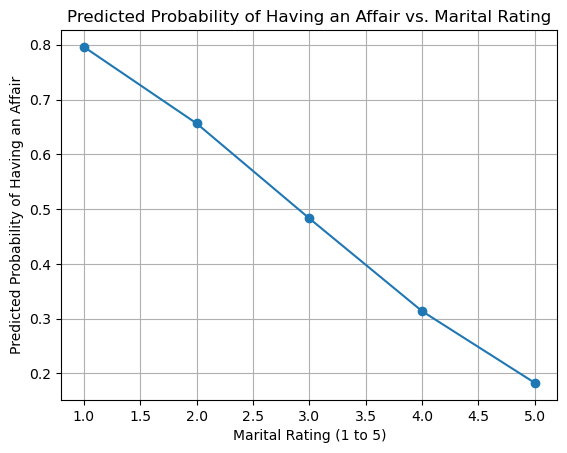

In [158]:
# Calculate the mean values for the non-varying predictors
means = affairs[['yrs_married', 'religious', 'age', 'educ', 'occupation']].mean()

#The artificial test dataset
test_data = pd.DataFrame({
    'rate_marriage': np.arange(1, 6),  # Varying marital rating from 1 to 5
    'yrs_married': means['yrs_married'],
    'religious': means['religious'],
    'age': means['age'],
    'educ': means['educ'],
    'occupation': means['occupation'],
    'children': means.get('children', 0)  # Ensure 'children' is handled, default to 0 if missing
})

#Constant for the intercept
test_data['const'] = 1

# Print out the columns to verify 'const' is included and matches the model
print("Test Data Columns:", test_data.columns)
print("Model Parameters Index:", logit_model.params.index)

# Ensure the column order matches the order in which the model was trained
test_data = test_data[logit_model.params.index]

# Verify shape alignment
print("Test Data Shape:", test_data.shape)
print("Model Params Shape:", logit_model.params.shape)

# Predict probabilities using the logistic regression model
predicted_probs = logit_model.predict(test_data)

# Add the predicted probabilities to the dataframe
test_data['predicted_prob'] = predicted_probs

# Plot the predicted probabilities
plt.plot(test_data['rate_marriage'], test_data['predicted_prob'], marker='o')
plt.title('Predicted Probability of Having an Affair vs. Marital Rating')
plt.xlabel('Marital Rating (1 to 5)')
plt.ylabel('Predicted Probability of Having an Affair')
plt.grid(True)
plt.show()

In [159]:
''' 
In this analysis, it's obvious that martial rating is a key factor when predicting when someone might have an affair. The higher the
satisfaction, the less likely infedility becomes. But even though these inisghts are valuable, there are glaring ethical issues that 
can come from this analysis. The data involves deeply personal details about peoples relationships. It is very crucial to 
protect the privacy of this data and the findings must be protected and handled to avoid it getting in the wrong hands. It also 
unfair to make assumptions fromthese findings because relationships are complicated and its important not to oversimplify and 
misinterpet the results.'''

" \nIn this analysis, it's obvious that martial rating is a key factor when predicting when someone might have an affair. The higher the\nsatisfaction, the less likely infedility becomes. But even though these inisghts are valuable, there are glaring ethical issues that \ncan come from this analysis. The data involves deeply personal details about peoples relationships. It is very crucial to \nprotect the privacy of this data and the findings must be protected and handled to avoid it getting in the wrong hands. It also \nunfair to make assumptions fromthese findings because relationships are complicated and its important not to oversimplify and \nmisinterpet the results."

### Baseball Salary Data Analysis

In this next problem set, I will use baseball salary data from the **Hitters dataset**, part of the *Introduction to Statistical Learning with Applications in Python* textbook. The dataset contains 1986 and career statistics, originally gathered from sources such as *Sports Illustrated* and *The Baseball Encyclopedia*. It includes details such as player salaries and performance statistics.

In [161]:
from ISLP import load_data
Hitters = load_data('Hitters')

In [162]:
Hitters.head()

AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
0    293    66      1    30   29     14      1     293     66       1     30   
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   

   CRBI  CWalks League Division  PutOuts  Assists  Errors  Salary NewLeague  
0    29      14      A        E      446       33      20     NaN         A  
1   414     375      N        W      632       43      10   475.0         N  
2   266     263      A        W      880       82      14   480.0         A  
3   838     354      N        E      200       11       3   500.0         N  
4    46      33      N        E      805       40       4    91.5         N

In [163]:
Hitters.shape

(322, 20)

In [164]:
numeric_columns = Hitters.select_dtypes(include='number')
min_values = numeric_columns.min()
max_values = numeric_columns.max()
min_max_df = pd.DataFrame({'Min': min_values, 'Max': max_values})
print(min_max_df)

          Min      Max
AtBat    16.0    687.0
Hits      1.0    238.0
HmRun     0.0     40.0
Runs      0.0    130.0
RBI       0.0    121.0
Walks     0.0    105.0
Years     1.0     24.0
CAtBat   19.0  14053.0
CHits     4.0   4256.0
CHmRun    0.0    548.0
CRuns     1.0   2165.0
CRBI      0.0   1659.0
CWalks    0.0   1566.0
PutOuts   0.0   1378.0
Assists   0.0    492.0
Errors    0.0     32.0
Salary   67.5   2460.0


### Salary Distribution vs. Performance

I aim to explore the distribution of salaries among different performance levels, specifically by comparing the volume of **hits** and **home runs** to player salaries. This analysis will help assess whether players are being overpaid or underpaid from the perspective of an owner or agent.

In [166]:
missing_values = Hitters.isnull().sum()

missing_values[missing_values > 0]

Salary    59
dtype: int64

### Dataset Summary

The dataset includes statistics from the **Hitters dataset**, featuring player salaries along with performance metrics such as **hits**, **home runs**, and other career stats from 1986. The data was originally sourced from *Sports Illustrated* and *The Baseball Encyclopedia*. 

Before proceeding with the analysis, I will need to address the following issues:
- **Missing salary data** for some players.
- **Outliers** in both salary and performance metrics that could skew the results.
- **Standardizing performance metrics** to ensure fair comparison across different players.

<function matplotlib.pyplot.show(close=None, block=None)>

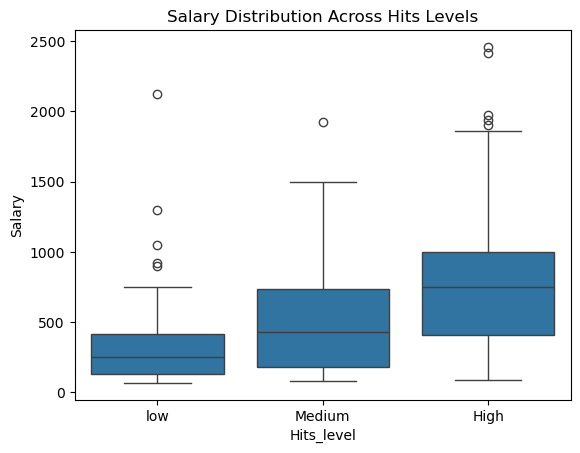

In [168]:
Hitters.dropna( subset=['Salary'], inplace= True)

Hitters['Hits_level'] = pd.qcut(Hitters['Hits'], 3, labels=['low', 'Medium','High'])
Hitters['Homeruns_Level'] = pd.qcut(Hitters['HmRun'], 3, labels = ['low', 'Medium', 'High'])

sns.boxplot(x='Hits_level', y = 'Salary', data= Hitters)
plt.title('Salary Distribution Across Hits Levels')
plt.show                        

<function matplotlib.pyplot.show(close=None, block=None)>

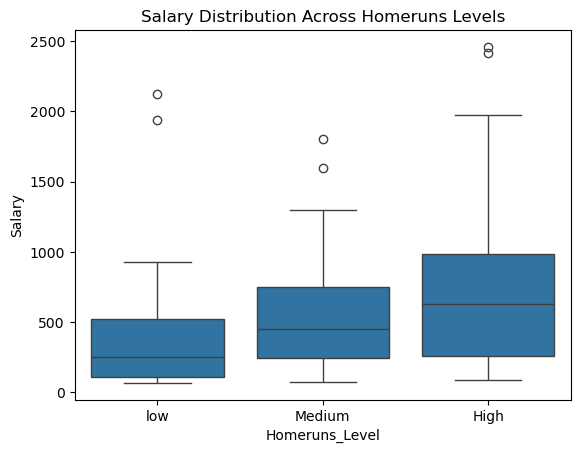

In [169]:
sns.boxplot(x='Homeruns_Level', y = 'Salary', data= Hitters)
plt.title('Salary Distribution Across Homeruns Levels')
plt.show 

In [170]:
correlation_hits_salary = Hitters['Hits'].corr(Hitters['Salary'])
correlation_hr_salary = Hitters['HmRun'].corr(Hitters['Salary'])
print(f'Correlation between hits and salary: {correlation_hits_salary:.2f}')
print(f'Correlation between homeruns and salary: {correlation_hr_salary:.2f}')

Correlation between hits and salary: 0.44
Correlation between homeruns and salary: 0.34


In [171]:
'''The emperical evidence gathered through correlation analysis and box plots strongly indicate 
that there is a positive relationship between player performance and salary. Players who perform 
better in these areas tend to earn higher salaries. This could be expected but there is noticeable
variablility in the salaries in each performance level, which might be influenced by other factors. 
This variability can suggest that there is outliers of athletes that may be overpaid or underpaid
when compared to peers with similar homeruns.'''

'The emperical evidence gathered through correlation analysis and box plots strongly indicate \nthat there is a positive relationship between player performance and salary. Players who perform \nbetter in these areas tend to earn higher salaries. This could be expected but there is noticeable\nvariablility in the salaries in each performance level, which might be influenced by other factors. \nThis variability can suggest that there is outliers of athletes that may be overpaid or underpaid\nwhen compared to peers with similar homeruns.'

In [172]:
'''  I want to see how the distribution of salaries among different level of performances, 
( volume of hits and homeruns compared to their salaries), The evidence showed that there 
is a positive relationship between player performance and salary. There are some variabilitity 
in the results showing potential outliers in the data, which could be beneficial for agents or 
owners when trying to ascess if their players are being pad according to their performance, there 
is also other factors that must be considered before moving forward in the anaylsis to ensure that 
the players are being accurately being paid.  The data is good enough to get an initial idea about 
the data but the missing values needs further investigation to why they are missing, there could 
be potential athletes who are being overpaid or underpaid '''

'  I want to see how the distribution of salaries among different level of performances, \n( volume of hits and homeruns compared to their salaries), The evidence showed that there \nis a positive relationship between player performance and salary. There are some variabilitity \nin the results showing potential outliers in the data, which could be beneficial for agents or \nowners when trying to ascess if their players are being pad according to their performance, there \nis also other factors that must be considered before moving forward in the anaylsis to ensure that \nthe players are being accurately being paid.  The data is good enough to get an initial idea about \nthe data but the missing values needs further investigation to why they are missing, there could \nbe potential athletes who are being overpaid or underpaid '

This analysis uses data from Machine Learning with R by Brett Lantz, focusing on individual medical costs billed by health insurance. 
The dataset includes variables such as age, sex, BMI, number of children, smoking status, region, and charges. 
I will explore the relationship between medical costs (charges) and the individual characteristics measured.

### Medical Costs Analysis

This analysis uses data from **Machine Learning with R** by Brett Lantz, focusing on individual medical costs billed by health insurance. The dataset includes variables such as:
- Age
- Sex
- BMI
- Number of children
- Smoking status
- Region
- Charges (medical costs)

I will explore the relationship between **medical costs (charges)** and the individual characteristics measured.

In [175]:
df = pd.read_csv('insurance.csv')
# df.head()

In [176]:
df.head

<bound method NDFrame.head of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In our analysis, we will be interested in the relationship between charges and the individual characteristics measured.

(a) Examine the bivariate relationships present in the data. Briefly discuss notable results.

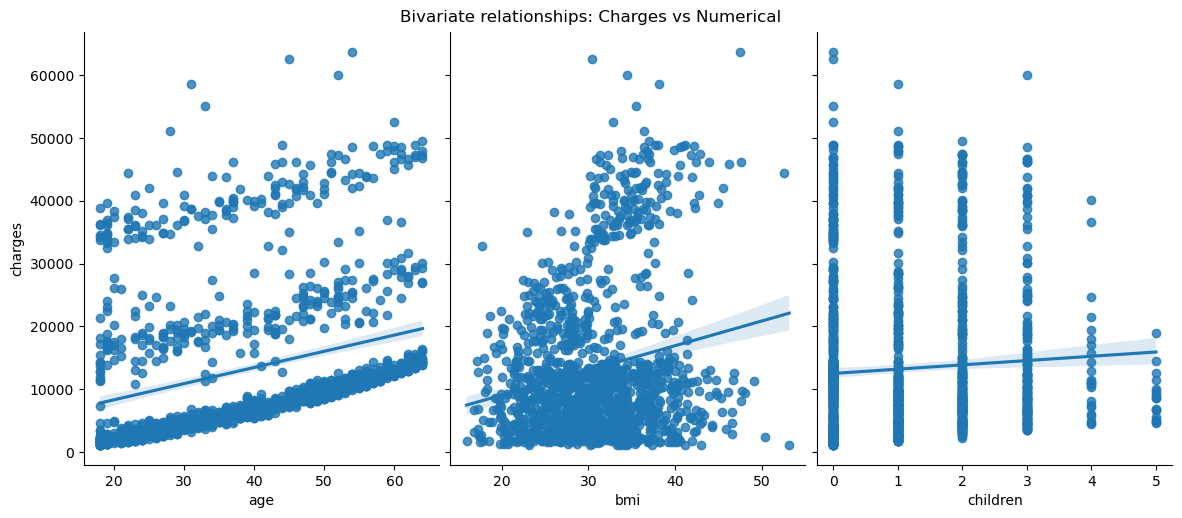

In [178]:
#Pairplot for numrical variables to relationship
sns.pairplot(df, x_vars=['age', 'bmi', 'children',], y_vars='charges', height=5, aspect=0.8, kind='reg')
plt.suptitle('Bivariate relationships: Charges vs Numerical', y=1.02)
plt.show()

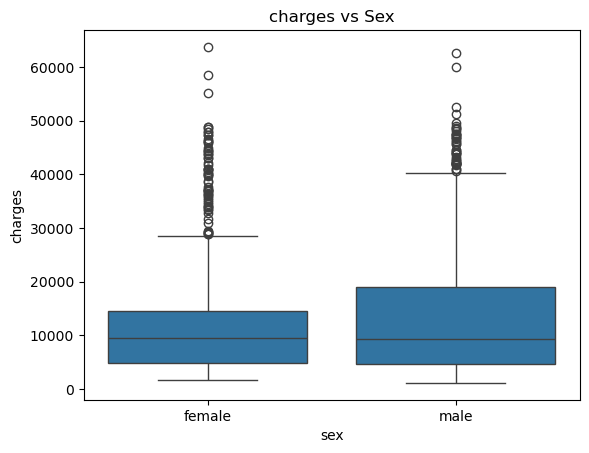

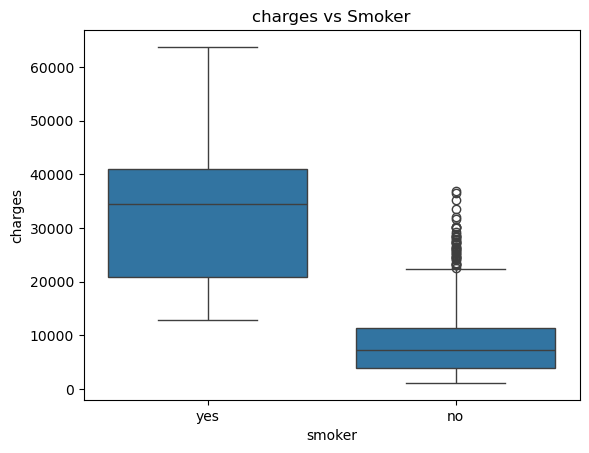

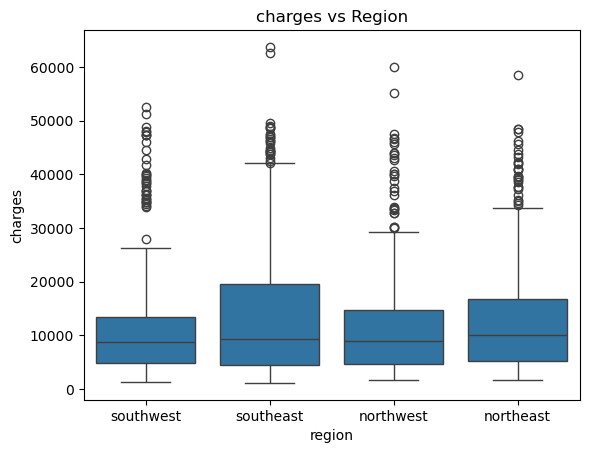

In [179]:
#Analayze the relationsip between categorial variables and charges
sns.boxplot(x='sex', y='charges', data=df)
plt.title('charges vs Sex') 
plt.show()

sns.boxplot(x='smoker', y='charges', data=df)
plt.title('charges vs Smoker') 
plt.show()

sns.boxplot(x='region', y='charges', data=df)
plt.title('charges vs Region') 
plt.show()

In [180]:
''' In the initial analysis, I used a pairplot and a scatterplot to found that age and smoking status are the most significant factors in influencing medical 
charges, with older individuals and smokers facing higher medical costs. BMI also shows a moderate postive correlation 
with charges(since the plots have a an upward-sloping pattern from left to right), suggesting that a higher BMI could lead to slightly higher expenses. On the other hand, the numer of children, 
gender, and religion seem to have little to no impact on charges. Overall its obvious that age and smoking status are the key 
factors to higher medical costs '''

' In the initial analysis, I used a pairplot and a scatterplot to found that age and smoking status are the most significant factors in influencing medical \ncharges, with older individuals and smokers facing higher medical costs. BMI also shows a moderate postive correlation \nwith charges(since the plots have a an upward-sloping pattern from left to right), suggesting that a higher BMI could lead to slightly higher expenses. On the other hand, the numer of children, \ngender, and religion seem to have little to no impact on charges. Overall its obvious that age and smoking status are the key \nfactors to higher medical costs '

### Multiple Linear Regression Model

I will fit a multiple linear regression model to explore the relationship between the variables and medical costs (charges). Specifically, I will assess how much variance in medical costs is explained by the variable **BMI**.

In [182]:
#Fit a multiple linerar regression model with BMI
X= df[['bmi']]# Use BMI for the regression
X = sm.add_constant(X)# Add a constant for the intercept 
y= df['charges']

#Fit the model
model = sm.OLS(y, X).fit()

#Summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Thu, 17 Oct 2024   Prob (F-statistic):           2.46e-13
Time:                        15:38:04   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1192.9372   1664.802      0.717      0.474   -2072.974    4458.849
bmi          393.8730     53.251      7.397      0.000     289.409     498.337
==============================================================================
Omnibus:                      261.030   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.091
Skew:                           1.297   Prob(JB):                     2.45e-94
Kurtosis:                       4.004   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [183]:
''' The R-squared value being 0.039 meaning that BMI explain only about 3.9% of the variance in the medical cost. 
This indicates that BMI by itself is not a strong enough predictor of medical cost'''

' The R-squared value being 0.039 meaning that BMI explain only about 3.9% of the variance in the medical cost. \nThis indicates that BMI by itself is not a strong enough predictor of medical cost'

### Evaluating Regression Assumptions

I will evaluate the statistical assumptions of the regression analysis from part (b) by analyzing the model residuals and identifying any unusual observations. This includes checking for issues such as:
- Non-linearity
- Heteroscedasticity
- Outliers

I will also discuss any concerns regarding the model's performance or validity based on the residual analysis.

In [185]:
model.resid

0        4702.929232
1      -12768.477159
2       -9741.285225
3       11848.646237
4       -8701.135138
            ...     
1333    -2790.636673
1334   -11559.383552
1335   -14077.324894
1336    -9346.916404
1337    16498.534086
Length: 1338, dtype: float64

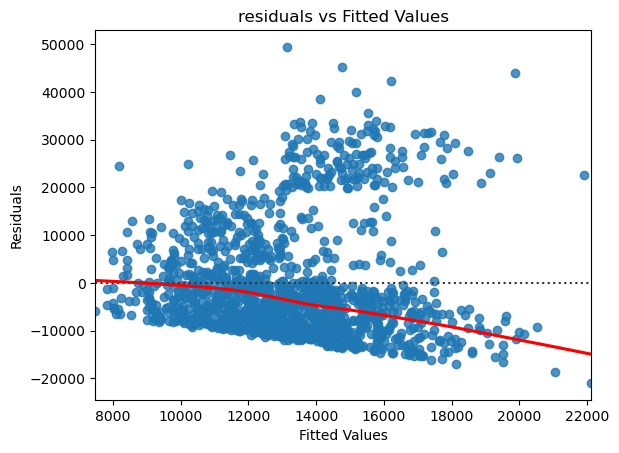

In [186]:
sns.residplot(x=model.fittedvalues, y=model.resid, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('residuals vs Fitted Values')
plt.show()

In [187]:
''' Looking at the residuals vs fitted values plot, Im seeing a few issues with the model. The cirbed pattern in the 
residuals hints that the relationship between BMI and charges might not be linear, which the model is not capturing. 
Plus, the spread of residuals increases with the fitted values, this is a signal of heteroscedasiticity, this means that 
the error variance isnt consistent across the board. There also some outliers with a large amount of residuals that can be 
possibly skewing the results. All of these concerns suggest that the model needs some adjusting to better fit the data'''

' Looking at the residuals vs fitted values plot, Im seeing a few issues with the model. The cirbed pattern in the \nresiduals hints that the relationship between BMI and charges might not be linear, which the model is not capturing. \nPlus, the spread of residuals increases with the fitted values, this is a signal of heteroscedasiticity, this means that \nthe error variance isnt consistent across the board. There also some outliers with a large amount of residuals that can be \npossibly skewing the results. All of these concerns suggest that the model needs some adjusting to better fit the data'

### Stepwise Model Selection

I will use a stepwise model selection procedure to obtain the "best" fit model. Afterward, I will compare this model with the full model fitted in part (b) to determine if they are different. If there are differences, I will explain how the selected model differs from the full model.

In [189]:
print(x.dtypes)

const            float64
age              float64
children         float64
yrs_married      float64
religious        float64
educ             float64
occupation       float64
rate_marriage    float64
dtype: object


In [190]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assuming 'x' is your DataFrame and 'y' is your target variable
# First, check if the 'smoker' column exists and if it needs cleaning

# Ensure no leading or trailing spaces in column names
x.columns = x.columns.str.strip()

# Check if 'smoker' column exists
if 'smoker' in x.columns:
    # Convert 'smoker' column to numeric
    x['smoker'] = x['smoker'].map({'yes': 1, 'no': 0})
else:
    print("Error: 'smoker' column not found in the DataFrame")

# Convert boolean columns to integers, if they exist
boolean_columns = ['sex_male', 'region_northwest', 'region_southeast', 'region_southwest']

for col in boolean_columns:
    if col in x.columns:
        x[col] = x[col].astype(int)
    else:
        print(f"Warning: '{col}' column not found in the DataFrame")

# Handle any missing or infinite values
x.replace([np.inf, -np.inf], np.nan, inplace=True)  # Replace infinite values with NaN
x.dropna(inplace=True)  # Drop rows with NaN values

# Align x and y to ensure they have the same indices
x, y = x.align(y, join='inner', axis=0)

# Define the stepwise selection function
def stepwise_selection(X, y, verbose=True):
    initial_features = X.columns.tolist()  # Start with all features
    best_features = []  # No features in the model initially

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        if not remaining_features:
            break  # If no features left to evaluate, break the loop

        # Initialize p-values series with NaNs
        new_pval = pd.Series(index=remaining_features, dtype=float)

        # Forward step: Add the feature with the smallest p-value
        for new_column in remaining_features:
            try:
                model = sm.OLS(y, sm.add_constant(X[best_features + [new_column]])).fit(disp=0)
                new_pval[new_column] = model.pvalues[new_column]
            except Exception as e:
                print(f"Error fitting model with feature '{new_column}': {e}")
                new_pval[new_column] = np.nan

        # Select the feature with the lowest p-value
        if new_pval.dropna().empty:
            break

        min_pval = new_pval.min()
        if min_pval < 0.05:
            best_feature = new_pval.idxmin()
            best_features.append(best_feature)
            if verbose:
                print(f"Add '{best_feature}' with p-value {min_pval:.6f}")
        else:
            break

        # Backward step: Remove features with p-values > 0.05
        while len(best_features) > 0:
            model = sm.OLS(y, sm.add_constant(X[best_features])).fit(disp=0)
            pvalues = model.pvalues.iloc[1:]  # Exclude constant term
            max_pval = pvalues.max()
            if max_pval >= 0.05:
                worst_feature = pvalues.idxmax()
                best_features.remove(worst_feature)
                if verbose:
                    print(f"Remove '{worst_feature}' with p-value {max_pval:.6f}")
            else:
                break

    if len(best_features) == 0:
        raise ValueError("No features were selected in the stepwise process.")

    return best_features

# Apply stepwise selection
best_features = stepwise_selection(x, y)

# Fit the final model with the selected features
x_best = x[best_features]
final_model = sm.OLS(y, sm.add_constant(x_best)).fit()

# Print the summary of the final selected model
print("Final Selected Model Summary:")
print(final_model.summary())

Error: 'smoker' column not found in the DataFrame
Add 'const' with p-value 0.000000
Add 'educ' with p-value 0.031325
Final Selected Model Summary:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.645
Date:                Thu, 17 Oct 2024   Prob (F-statistic):             0.0313
Time:                        15:38:05   Log-Likelihood:                -14475.
No. Observations:                1338   AIC:                         2.895e+04
Df Residuals:                    1336   BIC:                         2.897e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.

### Wisconsin Breast Cancer Dataset

In this analysis, I will use the **Wisconsin Breast Cancer dataset** from the UCI Machine Learning Repository. The goal is to predict whether tumors are malignant or benign based on the provided features.

In [192]:
# Web location of data file
location = "http://archive.ics.uci.edu/ml/machine-learning-databases/"
dataframe = "breast-cancer-wisconsin/breast-cancer-wisconsin.data"

(b) Investigate the data, ensuring that each variable is properly named and cast as the correct data type. Discuss any missing data.

In [194]:
url = location + dataframe
df = pd.read_csv(url, header=None)
# Assign column names based on the attributes listed on the website
df.columns = ['Sample_Code', 'Clump_Thickness', 'Uniformity_of_Cell_Size', 
              'Uniformity_of_Cell_Shape', 'Marginal_Adhesion', 
              'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 
              'Normal_Nucleoli', 'Mitoses', 'Class']
df.head()

''' Reference:
https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original'''

' Reference:\nhttps://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original'

In [195]:
df.info

<bound method DataFrame.info of      Sample_Code  Clump_Thickness  Uniformity_of_Cell_Size  \
0        1000025                5                        1   
1        1002945                5                        4   
2        1015425                3                        1   
3        1016277                6                        8   
4        1017023                4                        1   
..           ...              ...                      ...   
694       776715                3                        1   
695       841769                2                        1   
696       888820                5                       10   
697       897471                4                        8   
698       897471                4                        8   

     Uniformity_of_Cell_Shape  Marginal_Adhesion  Single_Epithelial_Cell_Size  \
0                           1                  1                            2   
1                           4                  5             

In [196]:
df.isnull().sum()

Sample_Code                    0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [197]:
df.dtypes

Sample_Code                     int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [198]:
# Replace '?' with NaN
df['Bare_Nuclei'].replace('?', np.nan, inplace=True)

# Convert to numeric type
df['Bare_Nuclei']= pd.to_numeric(df['Bare_Nuclei'])

#fill NaN values to the median of the column
df['Bare_Nuclei'].fillna(df['Bare_Nuclei'].median(), inplace=True)

/var/folders/nl/kqkc96_n4nn_yjqtnh9sl3sm0000gn/T/ipykernel_98981/600090037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bare_Nuclei'].replace('?', np.nan, inplace=True)
/var/folders/nl/kqkc96_n4nn_yjqtnh9sl3sm0000gn/T/ipykernel_98981/600090037.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [199]:
df['Bare_Nuclei'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

(c) Split the data into a training and test set such that a random 70\% of the observations are in the training set.

### Splitting the Dataset

I will split the dataset into a **training set** and a **test set**, with 70% of the observations randomly assigned to the training set. The remaining 30% will be used as the test set to evaluate the model's performance.

In [202]:
from sklearn.model_selection import train_test_split

# Drop the 'Sample_Code' column since it's just an identifier
df.drop(columns=['Sample_Code'], inplace=True)

# Separate features and target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target variable

# Split the data: 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [203]:
# Display the shapes of the resulting datasets
print("Training set size:", X_train.shape, y_train.shape)
print("Test set size:", X_test.shape, y_test.shape)

Training set size: (489, 9) (489,)
Test set size: (210, 9) (210,)


### Fitting the Machine Learning Model

I will fit a machine learning model to predict whether tissue samples are malignant or benign using the training data (70% of the observations). Then, I will use the model to classify the remaining 30% of the observations in the test set.

To evaluate the model's performance, I will compute a **confusion matrix** to analyze:
- True Positives
- False Positives
- True Negatives
- False Negatives

I will also discuss which types of errors (false positives or false negatives) are more concerning in the context of predicting cancer diagnoses.

**Reference**: [Logistic Regression - Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [205]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
model = LogisticRegression(max_iter=10000)

# Fit the model on the training data
model.fit(X_train, y_train)
# Use the model to make predictions on the test set
y_pred = model.predict(X_test)

In [206]:
from sklearn.metrics import confusion_matrix, classification_report
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix) 

Confusion Matrix:
[[141   2]
 [  6  61]]


### Confusion Matrix Interpretation
The confusion matrix shows the distribution of correct and incorrect classifications made by the model. False negatives (FN = 6) are particularly problematic in a medical context, as missing a malignant tumor diagnosis could lead to serious health risks. False positives (FP = 2), though less critical, could lead to unnecessary treatment and anxiety for patients.
References: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

### Confusion Matrix Interpretation
The confusion matrix shows the distribution of correct and incorrect classifications made by the model:
- **True Positives (TP)**: Correct predictions where the model correctly identifies an affair.
- **False Positives (FP)**: Cases where the model incorrectly predicts an affair (Type I error).
- **True Negatives (TN)**: Correct predictions where the model correctly identifies no affair.
- **False Negatives (FN)**: Cases where the model incorrectly predicts no affair (Type II error).

In this context, false negatives are more problematic, as failing to identify someone who has engaged in an affair could be a significant issue in certain analyses.

In [209]:
''' Describing real life applications below'''

' Describing real life applications below'

In [210]:
''' A real life application of classification in finance is credit scorring. In this application, the response variable 
is a yes or noif the loan applicant is likely to default on a loan. The predictors might include variable such as the 
applicant's crdit history, income level, employment status.  The goal in this application id prediction. The model aims 
to predict whether a new applicant will default on their loan based on data learned from historical data of past applicants. 
This helps financial isntitutions make informed decisons about whether it is safe to approve a loan application.  

Another application is spam detection and email filtering, email services use classification alogorithms to filter out spam. 
Ther response is a binary outcome "spam", "not spam". The predictors would include features such as subject line, presence of 
keywords, sender's email address, and the email structure like attachments, and links. The goal of this application is to 
predict whether or not the email is spam or not.

In healthcare, classification models are extremely helpful for diagnosing disease by categorizing patients based on medical 
data. The response is binary, indicating whether a disease is "present" or "absent". Predictors might include a patients 
symptoms, medical history, lab test results, and imaging data. The goal is prediction, as the model aims to predict the
presence or abscence of a disease based on the inputs, this aids doctors in kaking accurate diagnosis '''

' A real life application of classification in finance is credit scorring. In this application, the response variable \nis a yes or noif the loan applicant is likely to default on a loan. The predictors might include variable such as the \napplicant\'s crdit history, income level, employment status.  The goal in this application id prediction. The model aims \nto predict whether a new applicant will default on their loan based on data learned from historical data of past applicants. \nThis helps financial isntitutions make informed decisons about whether it is safe to approve a loan application.  \n\nAnother application is spam detection and email filtering, email services use classification alogorithms to filter out spam. \nTher response is a binary outcome "spam", "not spam". The predictors would include features such as subject line, presence of \nkeywords, sender\'s email address, and the email structure like attachments, and links. The goal of this application is to \npredict whet

In [211]:
''' In the real estate industry, regression models are used to predict house prices based on various features. 
The response variable is the house price, a continuous variable. Predictors include square footage, number of bedrooms, 
location, and the age of the property. The goal is prediction, as the model forecasts the sale price of a house, assisting 
buyers, sellers, and real estate agents in making informed decisions.

Retailers use regression models to predict future sales revenue based on historical data. The response variable is sales 
revenue, which is continuous. Predictors might include past sales figures, marketing spend, seasonality, and economic 
indicators. The goal is prediction, as the model helps forecast future sales, enabling better inventory and resource management.

In sports, regression models predict an athlete’s future performance, such as marathon completion time. The response variable 
is continuous, like time in minutes or seconds. Predictors include training hours, running speed, age, and diet. The goal is 
prediction, with the model estimating performance to help athletes and coaches optimize training for better results.'''

' In the real estate industry, regression models are used to predict house prices based on various features. \nThe response variable is the house price, a continuous variable. Predictors include square footage, number of bedrooms, \nlocation, and the age of the property. The goal is prediction, as the model forecasts the sale price of a house, assisting \nbuyers, sellers, and real estate agents in making informed decisions.\n\nRetailers use regression models to predict future sales revenue based on historical data. The response variable is sales \nrevenue, which is continuous. Predictors might include past sales figures, marketing spend, seasonality, and economic \nindicators. The goal is prediction, as the model helps forecast future sales, enabling better inventory and resource management.\n\nIn sports, regression models predict an athlete’s future performance, such as marathon completion time. The response variable \nis continuous, like time in minutes or seconds. Predictors include

In [212]:
'''A  flexible approach to regression or classification, like neural networks or random forests, can really shine 
when it comes to predictive accuracy and capturing complex patterns in the data. These models are great when dealing with 
intricate relationships that aren’t straightforward, especially in large datasets where overfitting is less of a concern. 
The trade-off is that while these models can adapt well to the data, they might end up fitting too closely to the 
training set, which could hurt their performance on new, unseen data. Plus, they tend to be more complex and harder to 
interpret, which isn’t ideal if you need to explain how decisions are made—something that’s pretty crucial in areas like 
healthcare or finance.

On the flip side, less flexible approaches, like linear regression, are often better when simplicity and interpretability are 
key. For example, in healthcare, where decisions based on model predictions can have significant consequences, being able to 
explain how a model arrived at a particular conclusion is vital. These models are also advantageous when working with smaller 
datasets, as they are less likely to overfit and can generalize better to new data. If your main goal is to understand the 
relationships between variables rather than just predict outcomes, these less flexible models give clearer insights into 
what’s really driving the results, which can be incredibly valuable.'''

'A  flexible approach to regression or classification, like neural networks or random forests, can really shine \nwhen it comes to predictive accuracy and capturing complex patterns in the data. These models are great when dealing with \nintricate relationships that aren’t straightforward, especially in large datasets where overfitting is less of a concern. \nThe trade-off is that while these models can adapt well to the data, they might end up fitting too closely to the \ntraining set, which could hurt their performance on new, unseen data. Plus, they tend to be more complex and harder to \ninterpret, which isn’t ideal if you need to explain how decisions are made—something that’s pretty crucial in areas like \nhealthcare or finance.\n\nOn the flip side, less flexible approaches, like linear regression, are often better when simplicity and interpretability are \nkey. For example, in healthcare, where decisions based on model predictions can have significant consequences, being able to

### Dataset with Five Predictors

Suppose we have a dataset with five predictors:
- \( X_1 = \text{GPA} \)
- \( X_2 = \text{IQ} \)
- \( X_3 = \text{Gender} \) (1 for Female, and 0 for Male)
- \( X_4 = \text{Interaction between GPA and IQ} \)
- \( X_5 = \text{Interaction between GPA and Gender} \)

**Note**: The data here is limited as gender was collected as a binary variable.

The response is starting salary after graduation (in thousands of dollars). Suppose we use least squares to fit the model and get the following coefficients:

\[
\hat{\beta_0} = 50, \quad \hat{\beta_1} = 20, \quad \hat{\beta_2} = 0.07, \quad \hat{\beta_3} = 35, \quad \hat{\beta_4} = 0.01, \quad \hat{\beta_5} = -10
\]

#### Which answer is correct and why? 

*Single choice question:*

i. For a fixed value of IQ and GPA, males earn more on average than females.

ii. For a fixed value of IQ and GPA, females earn more on average than males.

iii. For a fixed value of IQ and GPA, males earn more on average than females provided that the GPA is high enough.

iv. For a fixed value of IQ and GPA, females earn more on average than males provided that the GPA is high enough.

In [214]:
''' Answer (i) is the correct answer. The negative coeffecient of the interaction term between GPA and Gender is -10, 
this indicated for the same GPA and IQ females earn less on average than males. Specifically,the interation between GPA and 
Gender reduces the salary for females by 10 units per GPA points when compared to males. If you look how the interaction 
terms work you will notice that for men (X_5 = X_1 * 0 = 0) for women ( X_5 = X_1 * 1 = X_1)
Reference: https://www.technologynetworks.com/informatics/articles/calculating-a-least-squares-regression-line-equation-example-explanation-310265'''

' Answer (i) is the correct answer. The negative coeffecient of the interaction term between GPA and Gender is -10, \nthis indicated for the same GPA and IQ females earn less on average than males. Specifically,the interation between GPA and \nGender reduces the salary for females by 10 units per GPA points when compared to males. If you look how the interaction \nterms work you will notice that for men (X_5 = X_1 * 0 = 0) for women ( X_5 = X_1 * 1 = X_1)\nReference: https://www.technologynetworks.com/informatics/articles/calculating-a-least-squares-regression-line-equation-example-explanation-310265'

### Least Squares Function and Salary Prediction of a female with IQ of 110 and a GPA of 4.0.

In [216]:
''' Y = 50 + 20(X_1) + 0.07(X_2) + 35(X_3) + 0.01(X_4) - 10(X_5), after substituting the variables and calculating 
the answer is $137,100
Reference: https://www.technologynetworks.com/informatics/articles/calculating-a-least-squares-regression-line-equation-example-explanation-310265'''

' Y = 50 + 20(X_1) + 0.07(X_2) + 35(X_3) + 0.01(X_4) - 10(X_5), after substituting the variables and calculating \nthe answer is $137,100\nReference: https://www.technologynetworks.com/informatics/articles/calculating-a-least-squares-regression-line-equation-example-explanation-310265'

### True or False: Evidence of Interaction Effect

**Question**: Since the coefficient for the GPA/IQ interaction term is very small, there is little evidence of an interaction effect. Is this statement true or false?


In [218]:
''' False: The coeffecient for the GPA/IQ interaction for X_4 is 0.01, which is a small, indicating the interaction effect between 
IQ and GPA is minor. However saying there is "little evidence" based on this coefeccient size is not fair or entirely accurate. 
There are other metrics to consider when trying to claim there is "little evidence", even though coeffecient indicates a small
effect size, you would typically consider stastical signifcance like P-values and confidence intervels of the coefficent, 
which are not provided to help support the claim. Therefore, while the effect size is small, this alone doesnt dismiss the 
presence of an interraction effect.'''

' False: The coeffecient for the GPA/IQ interaction for X_4 is 0.01, which is a small, indicating the interaction effect between \nIQ and GPA is minor. However saying there is "little evidence" based on this coefeccient size is not fair or entirely accurate. \nThere are other metrics to consider when trying to claim there is "little evidence", even though coeffecient indicates a small\neffect size, you would typically consider stastical signifcance like P-values and confidence intervels of the coefficent, \nwhich are not provided to help support the claim. Therefore, while the effect size is small, this alone doesnt dismiss the \npresence of an interraction effect.'

### Poisson distribution

Suppose that $X_1, \ldots X_n$ form a random sample from a Poisson distribution for which the mean $\theta$ is unknown, $(\theta>0)$.

 Determine the MLE of $\theta$, assuming that at least one of the observed values is different from 0.

In [221]:
''' To determine the MLE for the theta in a poisson distribution, you first write the likelihood function, whch is the 
product of the individual probabilities for each observation. The likelihood function for n observations simplifies to a 
function of theta, you then have theta raised to the power of the sum of the observations and multiplied by an exponential 
term. After, taking the natural logarithm of this likelihood function gives us the log-likelihood, we have to then differniate
depending on theta.
Reference: https://python.quantecon.org/mle.html, https://opensourceecon.github.io/CompMethods/struct_est/MLE.html, 
https://www.youtube.com/watch?v=ttmKa1DovfI''' 

' To determine the MLE for the theta in a poisson distribution, you first write the likelihood function, whch is the \nproduct of the individual probabilities for each observation. The likelihood function for n observations simplifies to a \nfunction of theta, you then have theta raised to the power of the sum of the observations and multiplied by an exponential \nterm. After, taking the natural logarithm of this likelihood function gives us the log-likelihood, we have to then differniate\ndepending on theta.\nReference: https://python.quantecon.org/mle.html, https://opensourceecon.github.io/CompMethods/struct_est/MLE.html, \nhttps://www.youtube.com/watch?v=ttmKa1DovfI'

Show that the MLE of $\theta$ does not exists if every observed value is 0.

In [223]:
''' If all observed values are equal to zero, the sum of the observations is zero, which leads to the MLE of theta equal to zero.
Since theta must be greater than zero by the definition, the rsult implies that the MLE does not exist within the paramater 
space when the observations are zero. Therefore, the MLE for theta is undefined in this case.
Reference: https://python.quantecon.org/mle.html, https://opensourceecon.github.io/CompMethods/struct_est/MLE.html'''

' If all observed values are equal to zero, the sum of the observations is zero, which leads to the MLE of theta equal to zero.\nSince theta must be greater than zero by the definition, the rsult implies that the MLE does not exist within the paramater \nspace when the observations are zero. Therefore, the MLE for theta is undefined in this case.\nReference: https://python.quantecon.org/mle.html, https://opensourceecon.github.io/CompMethods/struct_est/MLE.html'

### Web Scraper for Song Lyrics

In this problem, I will build a simple web scraper to collect and process song lyrics for a specific artist. The goal is to create a set of functions that can easily scrape an artist’s albums, songs, and lyrics from a website like lyrics.com, and output the data in a structured format.

The deliverables include:
1. Functions to identify the artist's albums, songs, and lyrics links.
2. A function to collect and store the lyrics for each song along with additional information, such as the number of words.
3. An example implementation using a chosen artist, demonstrating the flexibility of the code to work with different artists.

The final output will be a **.csv file** containing the following columns:
- Artist name
- Album
- Song title
- Lyrics URL
- Song lyrics
- Word count

 Write a function to get all the songs of a particular artist. 

In [231]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time

In [237]:
def scrape_artist_songs(artist_name):
    # Set up the webdriver
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    
    # Navigate to Spotify's search page
    search_url = f"https://open.spotify.com/search/{artist_name.replace(' ', '%20')}"
    driver.get(search_url)
    
    # Wait for the page to load
    time.sleep(5)

    # Click on the artist's profile link
    try:
        artist_link = driver.find_element(By.XPATH, "//a[contains(@href, '/artist/')]")
        artist_link.click()
    except Exception as e:
        print(f"Artist not found: {e}")
        driver.quit()
        return []
    
    # Wait for artist page to load
    time.sleep(5)

    # Scrape all song titles and URLs from the artist's profile
    songs = []
    try:
        song_elements = driver.find_elements(By.XPATH, "//a[contains(@href, '/track/')]")
        
        # Iterate through song elements to avoid stale elements by re-fetching them
        for song_element in song_elements:
            try:
                song_title = song_element.text
                song_url = song_element.get_attribute('href')
                songs.append({
                    "artist": artist_name,
                    "song_title": song_title,
                    "song_url": song_url,
                })
            except StaleElementReferenceException:
                print(f"Stale element encountered. Refreshing the song element.")
                song_elements = driver.find_elements(By.XPATH, "//a[contains(@href, '/track/')]")
    except Exception as e:
        print(f"Error retrieving song elements: {e}")
    
    driver.quit()  # Close the browser when done
    return songs

def display_songs(songs):
    # Convert the list of dictionaries into a dataframe
    if songs:
        df = pd.DataFrame(songs)
        print(df.to_string(index=False))
    else:
        print("No songs found to display.")

# Example usage
artist = "Adele"
all_songs = scrape_artist_songs(artist)
display_songs(all_songs)  # Correctly display the songs using pandas

artist           song_title                                              song_url
 Adele           Easy On Me https://open.spotify.com/track/46IZ0fSY2mpAiktS3KOqds
 Adele Set Fire to the Rain https://open.spotify.com/track/73CMRj62VK8nUS4ezD2wvi
 Adele     Someone Like You https://open.spotify.com/track/1zwMYTA5nlNjZxYrvBB2pV
 Adele  Rolling in the Deep https://open.spotify.com/track/1c8gk2PeTE04A1pIDH9YMk
 Adele              Skyfall https://open.spotify.com/track/6VObnIkLVruX4UVyxWhlqm


 Write a function to get all the lyrics for a particular song.

In [239]:
def get_lyrics(song_title, artist_name):
    # Set up the webdriver
    driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
    
    # Format the search to include song title and artist
    query = f"{song_title} {artist_name} Genius lyrics"
    search_url = f"https://www.google.com/search?q={query.replace(' ', '+')}"
    
    # Navigate to Google search results
    driver.get(search_url)
    
    # Click the first genius.com link in the search results
    link = driver.find_element(By.XPATH, "//a[contains(@href, 'genius.com')]")
    link.click()
    
    time.sleep(2)  # Give time for the page to load

    # Scrape the lyrics from the genius page
    lyrics = driver.find_element(By.CSS_SELECTOR, 'div[class^="Lyrics__Container"]').text

    driver.quit()  # Close the browser when done
    return lyrics

# Example 
song_title = "Hello"
artist_name = "Adele"
lyrics = get_lyrics(song_title, artist_name)
print(lyrics)

[Verse 1]

Hello, it's me

I was wondering if, after all these years, you'd like to meet
To go over everything

They say that time's supposed to heal ya
But I ain't done much healin'

Hello, can you hear me?

I'm in California dreaming about who we used to be
When we were younger and free

I've forgotten how it felt before the world fell at our feet


[Pre-Chorus]
There's such a difference between us
And a million miles


[Chorus]

Hello from the other side
I must've called a thousand times
To tell you I'm sorry for everything that I've done
But when I call, you never seem to be home

Hello from the outside
At least, I can say that I've tried
To tell you I'm sorry for breaking your heart
But it don't matter, it clearly doesn't tear you apart anymore


[Verse 2]
Hello, how are you?
It's so typical of me to talk about myself, I'm sorry
I hope that you're well
Did you ever make it out of that town
Where nothing ever happened?


## Conclusion
In this notebook, I explored the relationship between personal characteristics and various outcomes using multiple datasets.
I applied different machine learning techniques and evaluated their performance through visualizations and error metrics.
The key insights include [summarize your key takeaways], and I discussed the ethical implications of sensitive data usage.
Overall, this analysis demonstrated the value of applying data science methodologies to real-world datasets.